# Media processing [test]

Carlos Andrés Reyes Evangelista
157068
Ingeniería en Sistemas Computacionales

This practice is intended to experiment for first time with some image processing using OpenCV Python [Anaconda] and Jupyter.

This simple practice will load an image using OpenCV commands, visualize it, check its size, extract its RGB (BGR) channels and compare its original size and the one it has when compressed in JPEG format.
Some Colorspace manipulation will be done as well, the image will be converted from RGB (GBR) model to Grayscale, YCrCb (YUV), CIE XYZ and HSV in order to compare those channels. 

In [1]:
#importing openCV and aliasing it to a slightly compacter name [cv]
import cv2 as cv

ModuleNotFoundError: No module named 'cv2'

In [2]:
#variables declaration

#image to be used the whole program
#https://www.google.com.mx/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwi_4K3LrZHgAhUSJDQIHWYfCrIQjRx6BAgBEAU&url=https%3A%2F%2Fpicsart.com%2Fi%2Fsticker-fruits-png-236001103051212%3Fhl%3Des&psig=AOvVaw1Al-znNOKHmt6WJKSnhzBG&ust=1548795122575532
#please store in the same folder than this notebook with the name of:
#image.png
image = cv.imread('image.png')



#if the image is too big, please uncomment this line
#image = cv.resize(image, None, fx=0.5, fy=0.5, interpolation=cv.INTER_LINEAR)




#list of flags that will be used to change between the required colourspaces
flags = [cv.COLOR_BGR2GRAY, cv.COLOR_BGR2YUV, cv.COLOR_BGR2XYZ, cv.COLOR_BGR2HSV]

#auxiliar list of colourspaces' names. They'll be used in title bar of every window
names = ["RGB (BGR)", "GRAYSCALE", "YUV (YCbCr)", "CIE (XYZ)", "HSV"]

#in this list will be stored the images (Mat objects) after the colourspace changes are performed 
images = [image]

#auxiliar list where every nested list stores every channel's name for every colourspace
#note that the order is exactly correspondent to the one colocated at names list
#the empty list correspond to the Grayscale colourspace, that has no channels to split
channelsNames = [[" BLUE CHANNEL", " GREEN CHANNEL", " RED CHANNEL"],
[],
[" Y GRAYSCALE", " U Cb CHANNEL", " U Cr CHANNEL"], 
[" BLUE CHANNEL", " GREEN CHANNEL", " RED CHANNEL"],
[" HUE CHANNEL", " SATURATION CHANNEL", " VALUE CHANNEL"]]




NameError: name 'cv' is not defined

In [8]:
#actual processing

#this loop will use every flag in flags list to create a new image for each colourspace
#the created images will be append to the images list
for i in flags:
    images.append(cv.cvtColor(image, i))
    
#this loop is the responsible for the display of every image
#although it may look like a mess, the functioning is pretty easy:
#the outter loop iterates for each colourspace storing in 'i' a list with:
    #[0] the name of that colourspace, 
    #[1] the corresponding image 
    #[2] and the list with the channels' names for that colourspace
#except for the Grayscale colourspace, the channels of that image are stored in the channels array
#it is begun a new loop that iterates over a new list 'j' that contains:
    #[0] the 3 channels
    #[1] the 3 names for those channels i[2]
#then each channel (j[0]) is displayed and the title of its window is determined by 
#"nameOfTheColourspace(i[0]) + nameOfTheChannel (j[1])"
#after the four images are displayed (each in its own window), the program will wait for a key to be pressed and begin the next iteration
for i in zip(names, images, channelsNames):
    cv.imshow(i[0], i[1])
    if i[0] != "GRAYSCALE":
        channels = cv.split(i[1])
        for j in zip(channels, i[2]):
            cv.imshow(i[0] + j[1], j[0])
    cv.waitKey(0)
    cv.destroyAllWindows()



In [9]:
#a new JPEG formatted image is stored in the same folder
cv.imwrite("image.jpg", image, [cv.IMWRITE_JPEG_QUALITY, 90])

True

Below a comparation of the byte size between both images.
The image with name image.jpg is the one generated by the program with a JPEG quality of 90%

The bytes difference among the original image (image.png) and the compressed one is of (1,480,453 - 213,395) = 1,267,058 bytes 

Which means that the compressed image is just a little more than the 14% of the original one, it is an huge reduction from every point of view.  

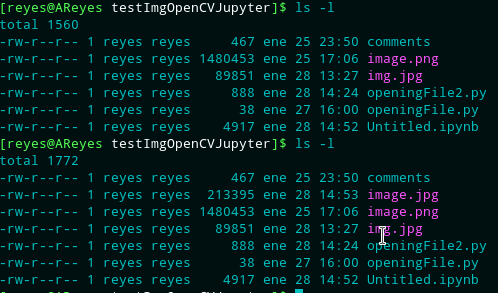